## Homework 3 Trees

#### Qingwen Wang

In the folder with Monday's notebook is a file called classify_me.csv. The column 'Target' gives the class labels.

1. Read in this file. How many classes are there? How many features are there? Are there any missing entries?

2. Split into training and test sets (30% test set). Use random_state=5 so your splits are reproducible.

3. Use all the features to build a classifier on the training set. Try bagging, random forest, boosting, and k-nearest neighbors. For knn, cross validate the number of neighbors you use. In your random forest implementation, build the trees deep -- that is, do not set a value for max_depth. For bagging and random forest,  cross validate the number of trees you use (given by the n_estimators parameter). For your boosting model, validate all of the parameters: n_estimators, learning_rate, and max_depth. In all three models, set random_state=5 so the results are reproducible. 

4. Comment on which model gives the best results on the test set.  For the best model, comment on feature importances (if relevant).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [4]:
classify = pd.read_csv('classify_me.csv')
classify.head()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,J,Target
0,0,0.150333,-1.468600,0.420842,-0.878333,-1.348358,0.686323,-0.663374,-2.301067,1.302455,0.320666,2
1,1,-1.632086,-0.705800,0.336495,0.024062,-0.493619,-1.534829,-0.024577,-0.296786,0.320047,0.506105,1
2,2,-1.285627,1.381077,-0.385668,1.446167,-0.348163,-2.255813,0.272703,-0.964729,-1.515589,0.454248,2
3,3,-0.012135,-0.729971,-1.132579,1.076787,1.235348,1.234472,-1.809369,0.735971,-1.349093,-0.061655,0
4,4,-1.303877,0.930213,0.801927,-1.750493,0.846840,-0.258996,-0.507816,0.560169,0.583438,-0.472208,0


In [8]:
classify['Target'].value_counts()

1    380
0    333
2    287
Name: Target, dtype: int64

In [9]:
classify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   A           1000 non-null   float64
 2   B           1000 non-null   float64
 3   C           1000 non-null   float64
 4   D           1000 non-null   float64
 5   E           1000 non-null   float64
 6   F           1000 non-null   float64
 7   G           1000 non-null   float64
 8   H           1000 non-null   float64
 9   I           1000 non-null   float64
 10  J           1000 non-null   float64
 11  Target      1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [11]:
classify.isna().sum()

Unnamed: 0    0
A             0
B             0
C             0
D             0
E             0
F             0
G             0
H             0
I             0
J             0
Target        0
dtype: int64

In [12]:
classify.isnull().sum()

Unnamed: 0    0
A             0
B             0
C             0
D             0
E             0
F             0
G             0
H             0
I             0
J             0
Target        0
dtype: int64

This dataset has 10 features (A to J), 3 classes(0,1,2), no missing values.

In [14]:
X=classify.drop(['Unnamed: 0','Target'],axis=1)
y=classify['Target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

#### KNN:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

Since KNN is based on distance, so before build knn model, we need first to check the distrubution of variables.If large variance exists, they should be scaled before feed into model.<br>
Here our variables are in a good distribution, all stds are around 1, and means are around 0. 

In [22]:
X.describe()

,A,B,C,D,E,F,G,H,I,J
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.063266,-0.054791,0.006328,0.017849,-0.014298,0.008647,-0.044524,0.022222,0.026690,0.019505
std,0.986794,1.025844,1.002614,1.004034,0.976537,0.992565,0.990367,1.018379,0.992252,1.003696
min,-3.108344,-3.886951,-3.327042,-3.352986,-3.063608,-3.041711,-2.911095,-3.080890,-3.377685,-3.448228
25%,-0.586783,-0.786290,-0.668572,-0.694203,-0.682192,-0.651344,-0.704221,-0.681347,-0.636699,-0.670257
50%,0.102531,-0.066470,0.055376,0.030282,0.020418,0.026342,-0.050620,0.018412,0.026011,0.014973
75%,0.734715,0.611712,0.707278,0.712739,0.639220,0.667833,0.576028,0.727414,0.748356,0.716156
max,2.925088,3.672869,3.412340,2.955662,3.021678,3.426620,2.807116,3.256437,3.213695,3.118702


In [23]:
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.fit_transform(X_test)

In [159]:
cvres=[]
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train, y_train, cv=5, scoring='accuracy')
    cvres.append(nn['test_score'].mean())

Text(0, 0.5, 'Acc')

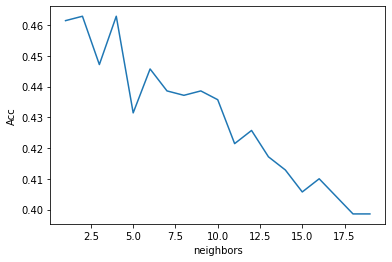

In [32]:
plt.plot(list(range(1,20)),cvres[0:19])
plt.xlabel('neighbors')
plt.ylabel('Acc')

In [33]:
np.argmax(cvres)+ 1

2

In [34]:
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)

In [35]:
accuracy_score(knn.predict(X_test),y_test)

0.47

The accurancy of KNN is only quiet low, only 47%.

#### Random Forest:

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
cvres_rf=[]
n_estimators = [i for i in range(100,1100,100)]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=5)
    cvrf = cross_validate(rf, X_train, y_train, cv=5, scoring='accuracy')
    cvres_rf.append(cvrf['test_score'].mean())

In [125]:
np.argmax(cvres_rf) + 1

8

In [126]:
rf = RandomForestClassifier(n_estimators=800, max_features='sqrt', random_state = 5).fit(X_train,y_train)

In [127]:
accuracy_score(rf.predict(X_test),y_test)

0.65

The accurancy of RF is 65%, when ```n_estimators``` = 900, ```max_depth``` = None.

#### Bagging:

In [108]:
from sklearn.ensemble import BaggingClassifier

In [157]:
cvres_bg=[]
n_estimators = [i for i in range(100,1100,100)]
for n in n_estimators:
    bg = BaggingClassifier(n_estimators=n, random_state=5)
    cvbg = cross_validate(bg, X_train, y_train, cv=5, scoring='accuracy')
    cvres_bg.append(cvbg['test_score'].mean())

In [160]:
np.argmax(cvres_bg) + 1

3

In [161]:
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=400,random_state=5).fit(X_train, y_train)

In [162]:
accuracy_score(bg.predict(X_test),y_test)

0.64

The accurancy of RF is 64%, when ```n_estimators``` = 400.

#### Boosting:

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [156]:
parameters = {'learning_rate':[0.1,0.01,0.001], 
              'n_estimators':[100,200,300,400,500,600,700],
              'max_depth':[2,3,4,5,6,7]}

In [171]:
boost_regr = GridSearchCV(GradientBoostingClassifier(random_state=5), parameters)
boost_regr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]})

In [172]:
boost_res_df = pd.DataFrame(boost_regr.cv_results_)

In [174]:
boost_res_df[boost_res_df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,1.56079,0.03522,0.002933,0.000067,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.728571,0.735714,0.728571,0.721429,0.778571,0.738571,0.020504,1


learning rate = 0.1; max depth = 2; n_estimators = 500

In [177]:
best_breg = GradientBoostingClassifier(random_state=5,learning_rate=0.1,n_estimators=500,max_depth=2).fit(X_train,y_train)

In [178]:
best_breg.score(X_test, y_test)

0.73

Boosting score is better, 73% accuracy.

In [179]:
best_breg.feature_importances_

array([0.08177854, 0.10943942, 0.09569795, 0.10293385, 0.0825274 ,
       0.08456866, 0.12078882, 0.13488218, 0.09155215, 0.09583102])

(-1.0, 10.0)

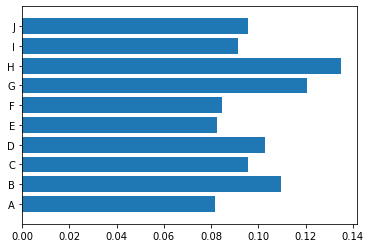

In [180]:
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),best_breg.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)

The best regression classifer is the boosting for this dataset, at 73% accurancy score. <br> 
The feature importance does not make much different here.